**Spatial aggregation**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
ncap_funding_df.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [5]:
state_data_df = pd.read_csv('/content/drive/MyDrive/State_data.csv')
state_data_df.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


Question 1:  Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [7]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

# Finding average PM2.5 values of all states
state_avg_pm25 = data_df.groupby('state')['PM2.5'].mean()

# Locating the state with highest avg PM2.5 value
highest_pm25_state = state_avg_pm25.idxmax()

print(f'''The state with highest average PM2.5 concentration
across all stations is: {highest_pm25_state}''')

The state with highest average PM2.5 concentration
across all stations is: Delhi


Question-2: Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [8]:
data =pd.read_csv('/content/drive/MyDrive/Data.csv')

data['date'] = pd.to_datetime(data['Timestamp'])

data_2023 = data[data['date'].dt.year == 2023]

hazardous_data = data_2023[data_2023['PM2.5'] > 300]

hazardous_days_count = hazardous_data.groupby('state')['date'].nunique()

state_most_hazardous_days = hazardous_days_count.idxmax()
most_hazardous_days = hazardous_days_count.max()

print(f"The state with the most days exceeding hazardous PM2.5 levels (above 300 µg/m³) in 2023 is {state_most_hazardous_days} with {most_hazardous_days} hazardous days.")


The state with the most days exceeding hazardous PM2.5 levels (above 300 µg/m³) in 2023 is Delhi with 49 hazardous days.


Question3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [9]:

data = pd.read_csv('/content/drive/MyDrive/Data.csv')


data['date'] = pd.to_datetime(data['Timestamp'])


data_2023 = data[data['date'].dt.year == 2023]


station_variability = data_2023.groupby(['state', 'station'])['PM2.5'].std()


state_variability = station_variability.groupby('state').mean()


state_highest_variability = state_variability.idxmax()
highest_variability = state_variability.max()

print(f"The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is {state_highest_variability} with an average standard deviation of {highest_variability} µg/m³.")


The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi with an average standard deviation of 79.97293740328254 µg/m³.


Question4:Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [10]:
df=pd.read_csv('/content/drive/MyDrive/Data.csv')

df['year'] = pd.to_datetime(df['Timestamp']).dt.year

df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2021)]

state_avg_pm25 = df_filtered.groupby('state')['PM2.5'].mean()

lowest_pm25_state = state_avg_pm25.idxmin()
lowest_pm25_value = state_avg_pm25.min()

print(f"The state with the lowest average PM2.5 levels during 2020-2021 is {lowest_pm25_state} with {lowest_pm25_value:.2f} µg/m³.")


The state with the lowest average PM2.5 levels during 2020-2021 is Mizoram with 14.32 µg/m³.


**Temporal Aggregation**

Question1:  Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Data.csv')

df['Date'] = pd.to_datetime(df['Timestamp'])

df_filtered = df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month == 8)]

max_pm25_station = df_filtered.loc[df_filtered['PM2.5'].idxmax(), ['station', 'PM2.5']]

print(f"The station that recorded the highest PM2.5 value in August 2020 is {max_pm25_station['station']} with {max_pm25_station['PM2.5']} µg/m³.")


The station that recorded the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with 805.51 µg/m³.


Question2: For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [12]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
data_df.head()

data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format = '%Y-%m-%d')
df_2018 = data_df[data_df['Timestamp'].dt.year == 2018]
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = df_2018[df_2018['station'] == station_name].copy()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
df_station['Season'] = df_station['Timestamp'].dt.month.apply(get_season)
season_avg_pm25 = df_station.groupby('Season')['PM2.5'].mean()
print(season_avg_pm25)
highest_pm25_season = season_avg_pm25.idxmax()
print(f'''The season with the highest pollution for the year 2018
for station {station_name} was: {highest_pm25_season}''')

Season
Monsoon    34.425196
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64
The season with the highest pollution for the year 2018
for station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB was: Winter


Q3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

1-Calculate the monthly average PM2.5 for weekdays and weekends separately.

2-X-axis: Months (January to December).

3-Y-axis: Average PM2.5 levels.

4-Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

<ipython-input-13-a6a35494155e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DayOfWeek'] = df_filtered['Date'].dt.dayofweek
<ipython-input-13-a6a35494155e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Weekend'] = df_filtered['DayOfWeek'] >= 5
<ipython-input-13-a6a35494155e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

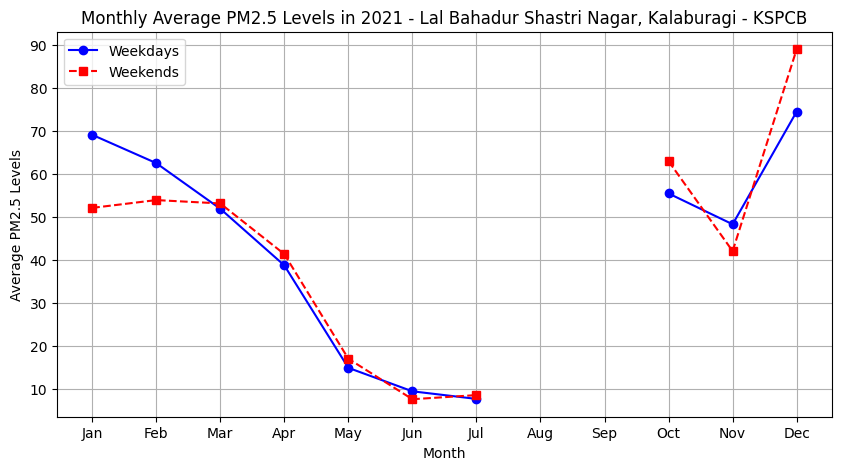

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])


target_station = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_filtered = df[(df['Date'].dt.year == 2021) & (df['station'] == target_station)]


df_filtered['DayOfWeek'] = df_filtered['Date'].dt.dayofweek
df_filtered['Weekend'] = df_filtered['DayOfWeek'] >= 5

df_filtered['Month'] = df_filtered['Date'].dt.month

monthly_avg_weekdays = df_filtered[~df_filtered['Weekend']].groupby('Month')['PM2.5'].mean()
monthly_avg_weekends = df_filtered[df_filtered['Weekend']].groupby('Month')['PM2.5'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_weekdays.index, monthly_avg_weekdays, marker='o', linestyle='-', label='Weekdays', color='blue')
plt.plot(monthly_avg_weekends.index, monthly_avg_weekends, marker='s', linestyle='--', label='Weekends', color='red')
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title(f"Monthly Average PM2.5 Levels in 2021 - {target_station}")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()


**Spatio-temporal aggregation**

Question1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
df['Date'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df_2022 = df[df['Year'] == 2022]

# Check if df_2022 is empty
if df_2022.empty:
    print("No data available for 2022. Please check your dataset.")
else:
    summer_months = [3, 4, 5]
    monsoon_months = [6, 7, 8, 9]

    df_summer = df_2022[df_2022['Month'].isin(summer_months)]
    df_monsoon = df_2022[df_2022['Month'].isin(monsoon_months)]

    # Check if df_summer or df_monsoon are empty
    if df_summer.empty or df_monsoon.empty:
        print("No data available for summer or monsoon months in 2022. Please check your dataset.")
    else:
        summer_avg_pm25 = df_summer.groupby('state')['PM2.5'].mean()
        monsoon_avg_pm25 = df_monsoon.groupby('state')['PM2.5'].mean()
        percentage_change = ((monsoon_avg_pm25 - summer_avg_pm25) / summer_avg_pm25) * 100
        state_most_diff = percentage_change.abs().idxmax()
        max_diff = percentage_change[state_most_diff]

        print(f"The state with the most difference in PM2.5 levels during monsoon compared to summer in 2022 is {state_most_diff} with a change of {max_diff:.2f}%")

The state with the most difference in PM2.5 levels during monsoon compared to summer in 2022 is Assam with a change of -61.18%


Question2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

<ipython-input-15-b3ff723b5959>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Season'] = df_delhi['Date'].dt.month.apply(get_season)


<Figure size 1200x600 with 0 Axes>

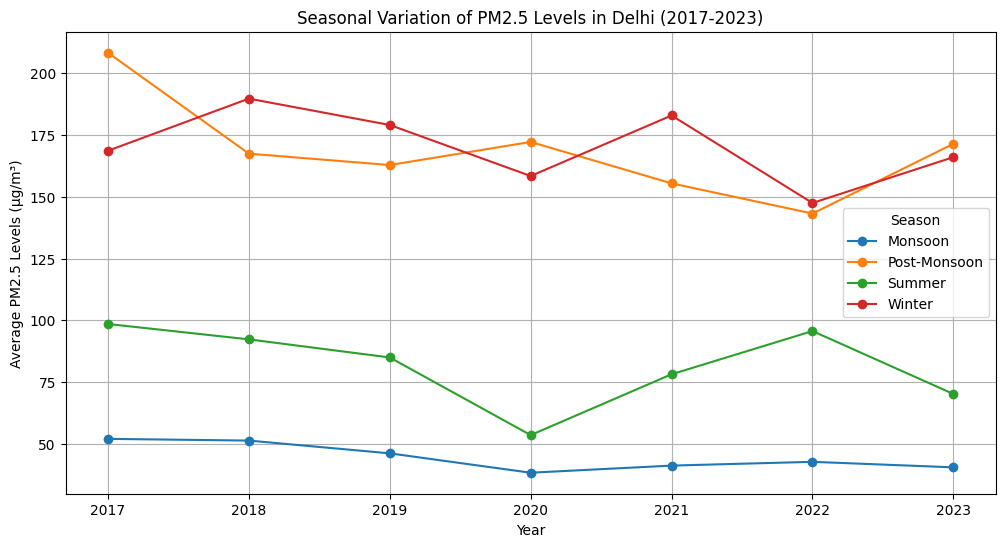

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])

df_delhi = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2023)]

# Define a function to get the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df_delhi['Season'] = df_delhi['Date'].dt.month.apply(get_season)

seasonal_avg_pm25 = df_delhi.groupby([df_delhi['Date'].dt.year, 'Season'])['PM2.5'].mean().reset_index()

seasonal_avg_pm25 = seasonal_avg_pm25.pivot(index='Date', columns='Season', values='PM2.5')

plt.figure(figsize=(12, 6))
seasonal_avg_pm25.plot(marker='o', linestyle='-', figsize=(12, 6))
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.grid(True)
plt.legend(title="Season")
plt.show()


Question3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

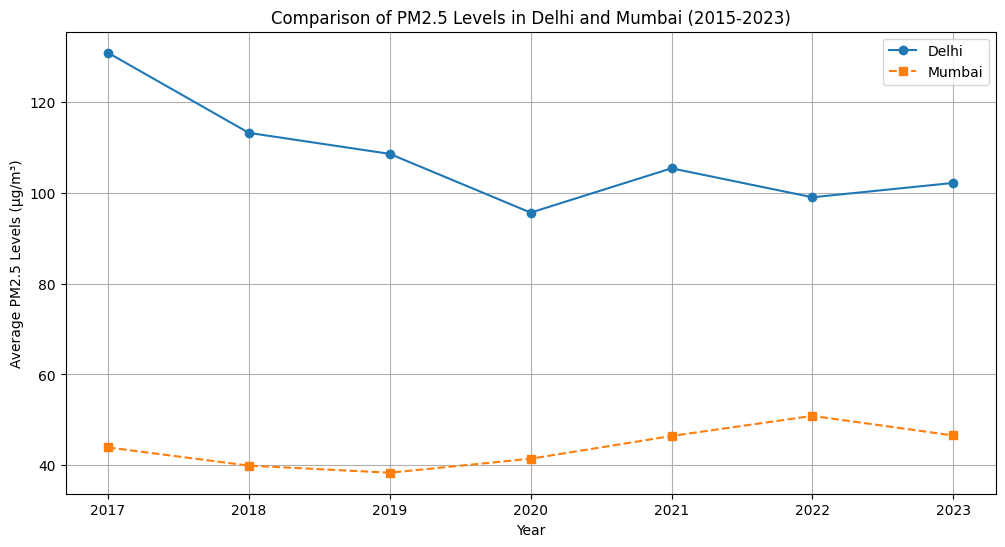

Standard Deviation of PM2.5 Levels (2015-2023):
Delhi: 11.72
Mumbai: 4.37

Delhi had more fluctuations in PM2.5 levels compared to Mumbai.


In [16]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])

df_delhi = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2023)]
df_mumbai = df[(df['state'] == 'Maharashtra') & (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2023)]

delhi_avg_pm25 = df_delhi.groupby(df_delhi['Date'].dt.year)['PM2.5'].mean()
mumbai_avg_pm25 = df_mumbai.groupby(df_mumbai['Date'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(delhi_avg_pm25.index, delhi_avg_pm25.values, marker='o', linestyle='-', label='Delhi')
plt.plot(mumbai_avg_pm25.index, mumbai_avg_pm25.values, marker='s', linestyle='--', label='Mumbai')
plt.title("Comparison of PM2.5 Levels in Delhi and Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.grid(True)
plt.legend()
plt.show()

delhi_std = delhi_avg_pm25.std()
mumbai_std = mumbai_avg_pm25.std()

print(f"Standard Deviation of PM2.5 Levels (2015-2023):")
print(f"Delhi: {delhi_std:.2f}")
print(f"Mumbai: {mumbai_std:.2f}")

if delhi_std > mumbai_std:
    print("\nDelhi had more fluctuations in PM2.5 levels compared to Mumbai.")
else:
    print("\nMumbai had more fluctuations in PM2.5 levels compared to Mumbai.")

**Population-Based**

Question1. Which state in India has the highest number of monitoring stations relative to its population?

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Data.csv')
state_station = df['state'].value_counts().reset_index()
state_station.columns = ['State', 'Station Count']

merged_df = pd.merge(state_station, state_data_df[['State', 'Population']], on='State')
merged_df['Stations per Capita'] = merged_df['Station Count'] / merged_df['Population']
highest_station_density_st = merged_df.loc[merged_df['Stations per Capita'].idxmax(), 'State']

print(f'''Indian state with the highest number of monitoring stations
relative to its population is {highest_station_density_st}.''')

Indian state with the highest number of monitoring stations
relative to its population is Chandigarh.


Question2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

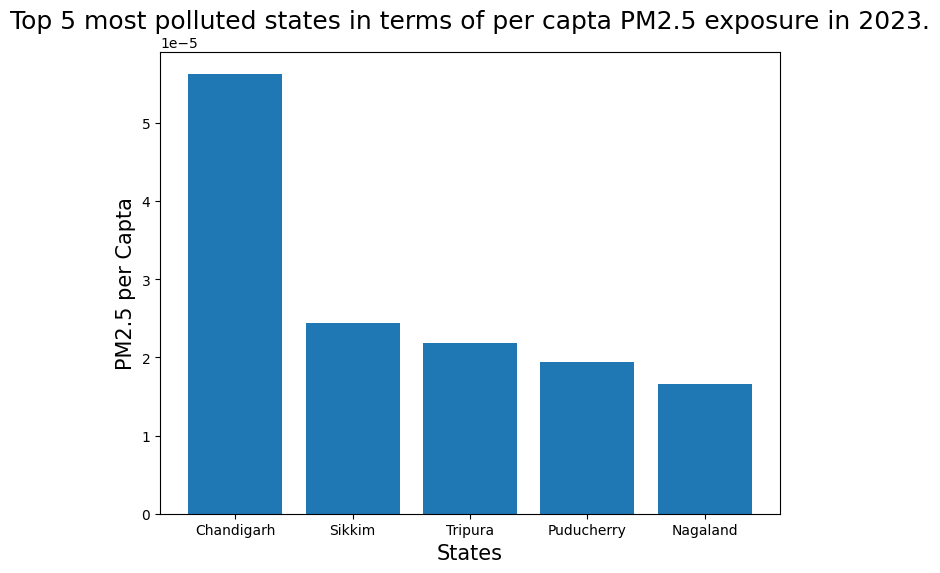

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data.csv')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = '%Y-%m-%d')
df_2023 =df[df["Timestamp"].dt.year == 2023].copy()
df_2023_pm25 = df_2023.groupby('state')['PM2.5'].mean().reset_index()
df_2023_pm25.columns = ['State', 'PM2.5']
df_population = state_data_df[['State', 'Population']]
merged_df = pd.merge(df_2023_pm25, df_population, on='State')
merged_df['PM2.5 per Capita'] = merged_df['PM2.5'] / merged_df['Population']
merged_df.sort_values(by='PM2.5 per Capita', ascending=False, inplace=True)
top_five_state = merged_df.head(5)
plt.figure(figsize=(8, 6))
plt.bar(top_five_state['State'], top_five_state['PM2.5 per Capita'])
plt.xlabel('States', fontsize=15)
plt.ylabel('PM2.5 per Capta', fontsize=15)
plt.title('Top 5 most polluted states in terms of per capta PM2.5 exposure in 2023.', fontsize=18)
plt.show()

Q3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

1-X-axis: Population density (people per square kilometer).

2-Y-axis: Average PM2.5 concentration.

3-Use a scatter plot to show the relationship, where each point represents a state.

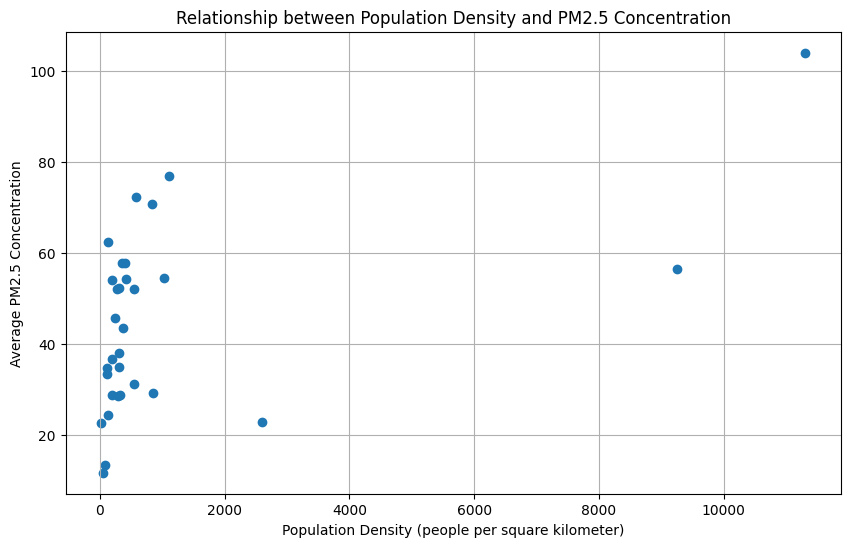

Correlation coefficient: 0.5108760390552376


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Data.csv')
population_data = pd.read_csv("/content/drive/MyDrive/State_data.csv")
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()
merged_data = pd.merge(state_avg_pm25, population_data, left_on='state', right_on='State', how='left')
merged_data['population_density'] = merged_data['Population'] / merged_data['Area (km2)']
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['population_density'], merged_data['PM2.5'])
plt.xlabel("Population Density (people per square kilometer)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship between Population Density and PM2.5 Concentration")
plt.grid(True)
plt.show()
correlation = merged_data['population_density'].corr(merged_data['PM2.5'])
print(f"Correlation coefficient: {correlation}")

**Area Based**

Q1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

1-X-axis: States.

2-Y-axis: PM2.5 concentration per square kilometer.

3-Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

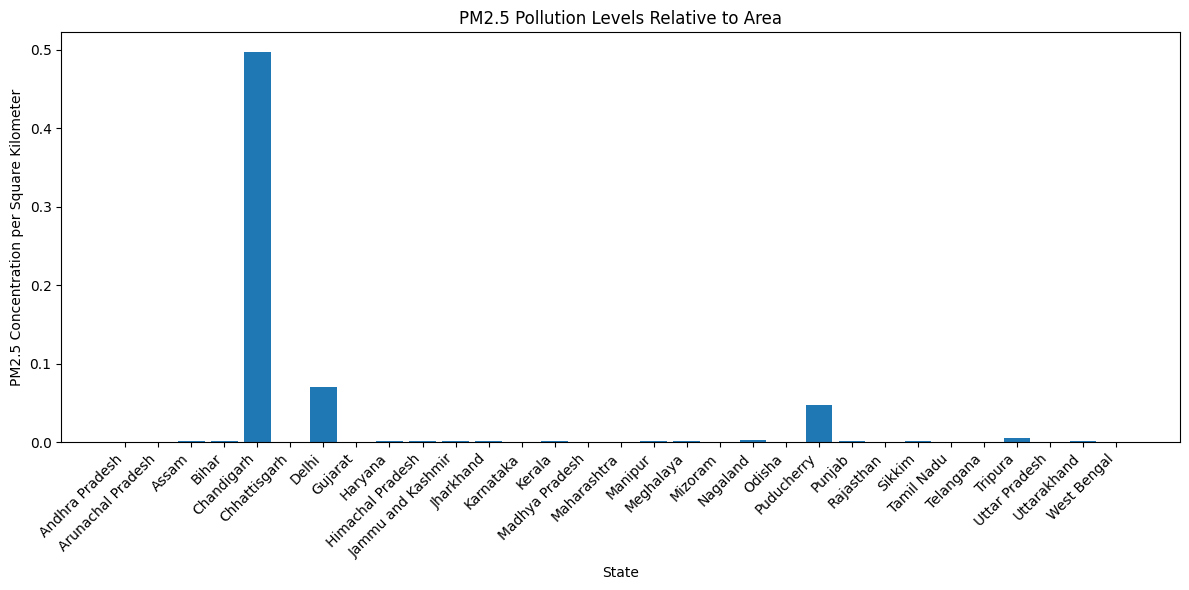

The state with the highest PM2.5 concentration per square kilometer is: Chandigarh


In [20]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
population_data = pd.read_csv("/content/drive/MyDrive/State_data.csv")

state_avg_pm25 = df.groupby('state')['PM2.5'].mean()

merged_data = pd.merge(state_avg_pm25, population_data, left_on='state', right_on='State', how='left')

merged_data['pm25_per_sqkm'] = merged_data['PM2.5'] / merged_data['Area (km2)']

state_highest_pm25_per_sqkm = merged_data.loc[merged_data['pm25_per_sqkm'].idxmax(), 'State']

plt.figure(figsize=(12, 6))
plt.bar(merged_data['State'], merged_data['pm25_per_sqkm'])
plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per Square Kilometer")
plt.title("PM2.5 Pollution Levels Relative to Area")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The state with the highest PM2.5 concentration per square kilometer is: {state_highest_pm25_per_sqkm}")

Q2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

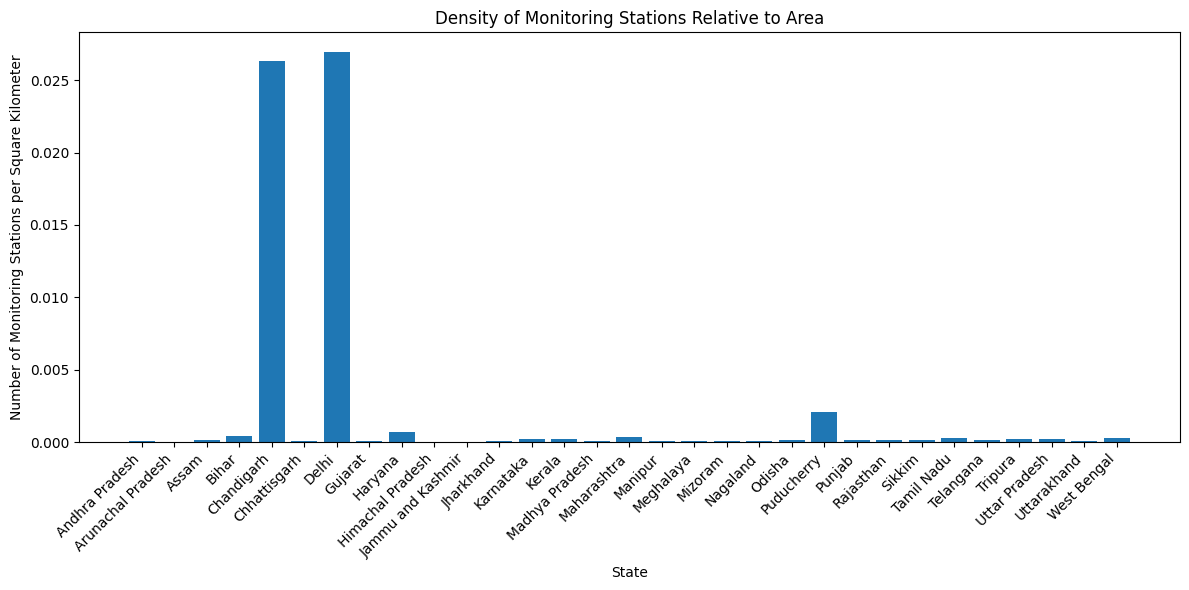

The state with the highest density of monitoring stations relative to its area is: Delhi


In [21]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
population_data = pd.read_csv("/content/drive/MyDrive/State_data.csv")

stations_per_state = df.groupby('state')['station'].nunique().reset_index()
merged_data = pd.merge(stations_per_state, population_data, left_on='state', right_on='State', how='left')

merged_data['stations_per_sqkm'] = merged_data['station'] / merged_data['Area (km2)']

state_highest_density = merged_data.loc[merged_data['stations_per_sqkm'].idxmax(), 'state']

plt.figure(figsize=(12, 6))
plt.bar(merged_data['state'], merged_data['stations_per_sqkm'])
plt.xlabel("State")
plt.ylabel("Number of Monitoring Stations per Square Kilometer")
plt.title("Density of Monitoring Stations Relative to Area")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"The state with the highest density of monitoring stations relative to its area is: {state_highest_density}")


Question3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

Average PM2.5 Levels in 2021:
state
Madhya Pradesh    47.095952
Maharashtra       46.440044
Name: PM2.5, dtype: float64

Population Density:
            State     Density
1     Maharashtra  365.192023
4  Madhya Pradesh  235.608557


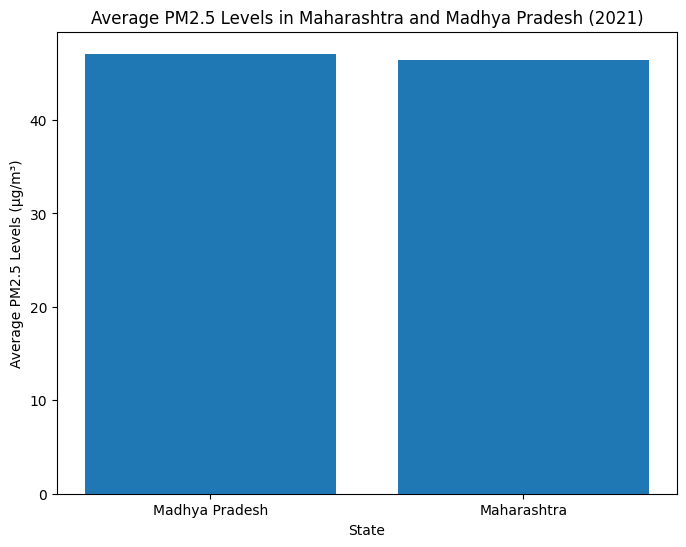


Correlation between Population Density and Average PM2.5: nan
There is no significant correlation between population density and PM2.5 levels in these states based on the given data.


In [22]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
population_data = pd.read_csv("/content/drive/MyDrive/State_data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])
df_2021 = df[df['Date'].dt.year == 2021]
states = ['Maharashtra', 'Madhya Pradesh']
df_filtered = df_2021[df_2021['state'].isin(states)]

avg_pm25 = df_filtered.groupby('state')['PM2.5'].mean()

population_density = population_data[population_data['State'].isin(states)][['State', 'Population', 'Area (km2)']]
population_density['Density'] = population_density['Population'] / population_density['Area (km2)']

print("Average PM2.5 Levels in 2021:")
print(avg_pm25)
print("\nPopulation Density:")
print(population_density[['State', 'Density']])

plt.figure(figsize=(8, 6))
plt.bar(avg_pm25.index, avg_pm25.values)
plt.xlabel("State")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)")
plt.show()

correlation = population_density['Density'].corr(avg_pm25)
print(f"\nCorrelation between Population Density and Average PM2.5: {correlation:.2f}")

if correlation > 0:
    print("There is a positive correlation, suggesting higher population density might be associated with higher PM2.5 levels.")
elif correlation < 0:
    print("There is a negative correlation, suggesting higher population density might be associated with lower PM2.5 levels.")
else:
    print("There is no significant correlation between population density and PM2.5 levels in these states based on the given data.")


**Funding Based**


Question1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

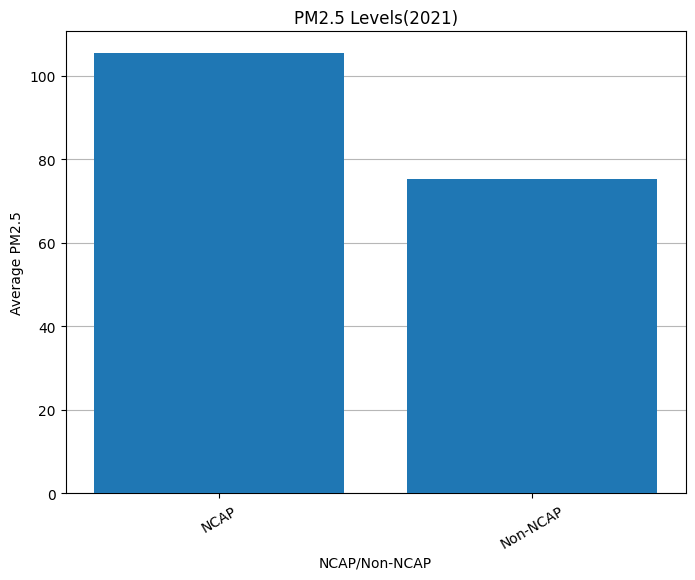

In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')
df_2021 = df[data_df['Timestamp'].dt.year == 2021]
avg_pm25_2021 = df_2021.groupby('state')['PM2.5'].mean().reset_index()
ncap_state = ncap_funding_df[ncap_funding_df['Amount released during FY 2021-22'] != '-']['State'].unique()
avg_pm25_2021['NCAP_Status'] = avg_pm25_2021['state'].apply(lambda x: "NCAP" if x in ncap_state else "Non-NCAP")
plt.figure(figsize=(8, 6))
plt.bar(avg_pm25_2021['NCAP_Status'], avg_pm25_2021['PM2.5'], zorder = 3)
plt.xlabel("NCAP/Non-NCAP")
plt.ylabel("Average PM2.5")
plt.title("PM2.5 Levels(2021)")
plt.xticks(rotation=30)
plt.grid(axis="y",  alpha=0.9, zorder = 0)
plt.show()

Question2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

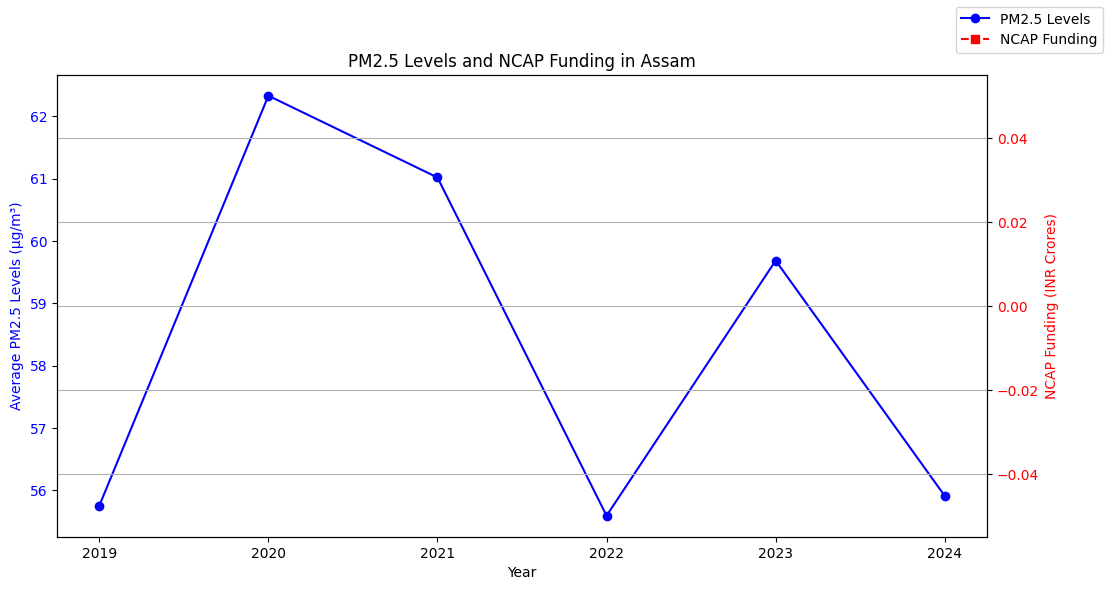

Correlation between PM2.5 levels and NCAP funding: nan


In [24]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
ncap_funding = pd.read_csv("/content/drive/MyDrive/NCAP_Funding.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])

assam_data = df[df['state'] == 'Assam']

merged_data = pd.merge(assam_data, ncap_funding, left_on='state', right_on='State', how='left')

merged_data['Amount released during FY 2021-22'] = pd.to_numeric(merged_data['Amount released during FY 2021-22'], errors='coerce')

yearly_data = merged_data.groupby(merged_data['Date'].dt.year).agg({'PM2.5': 'mean', 'Amount released during FY 2021-22': 'mean'})

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(yearly_data.index, yearly_data['PM2.5'], marker='o', linestyle='-', color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params('y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['Amount released during FY 2021-22'], marker='s', linestyle='--', color='red', label='NCAP Funding')
ax2.set_ylabel('NCAP Funding (INR Crores)', color='red')
ax2.tick_params('y', labelcolor='red')

plt.title('PM2.5 Levels and NCAP Funding in Assam')
fig.legend(loc='upper right')

plt.grid(True)
plt.show()

correlation = yearly_data['PM2.5'].corr(yearly_data['Amount released during FY 2021-22'])
print(f"Correlation between PM2.5 levels and NCAP funding: {correlation:.2f}")


Question3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

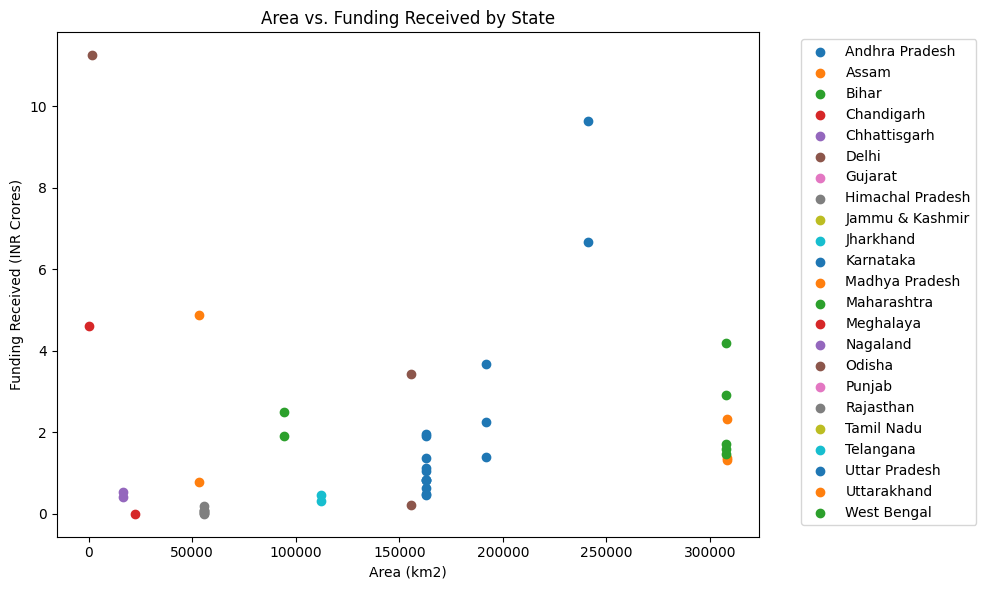

In [25]:
ncap_funding = pd.read_csv("/content/drive/MyDrive/NCAP_Funding.csv")
state_data = pd.read_csv("/content/drive/MyDrive/State_data.csv")

merged_data = pd.merge(ncap_funding, state_data, left_on='State', right_on='State', how='left')

merged_data['Amount released during FY 2021-22'] = pd.to_numeric(merged_data['Amount released during FY 2021-22'], errors='coerce')

fig, ax = plt.subplots(figsize=(10, 6))

for state in merged_data['State'].unique():
    state_data = merged_data[merged_data['State'] == state]
    ax.scatter(state_data['Area (km2)'], state_data['Amount released during FY 2021-22'], label=state)

ax.set_xlabel('Area (km2)')
ax.set_ylabel('Funding Received (INR Crores)')
ax.set_title('Area vs. Funding Received by State')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Miscellaneous Questions **

Question1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [48]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")
df['Date'] = pd.to_datetime(df['Timestamp'])

df_2023 = df[df['Date'].dt.year == 2023]

city_avg_pm25 = df_2023.groupby('station')['PM2.5'].mean()

most_polluted_city = city_avg_pm25.idxmax()

city_data = df_2023[df_2023['station'] == most_polluted_city]

hazardous_days = city_data[city_data['PM2.5'] > 300]['Date'].nunique()

total_days = city_data['Date'].nunique()

percentage_hazardous = (hazardous_days / total_days) * 100
print(f"The most polluted city in 2023 is {most_polluted_city}.")
print(f"Percentage of days with PM2.5 above 300 µg/m³: {percentage_hazardous:.2f}%")

The most polluted city in 2023 is Town Hall - Lal Bagh, Darbhanga - BSPCB.
Percentage of days with PM2.5 above 300 µg/m³: 0.82%


Question2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

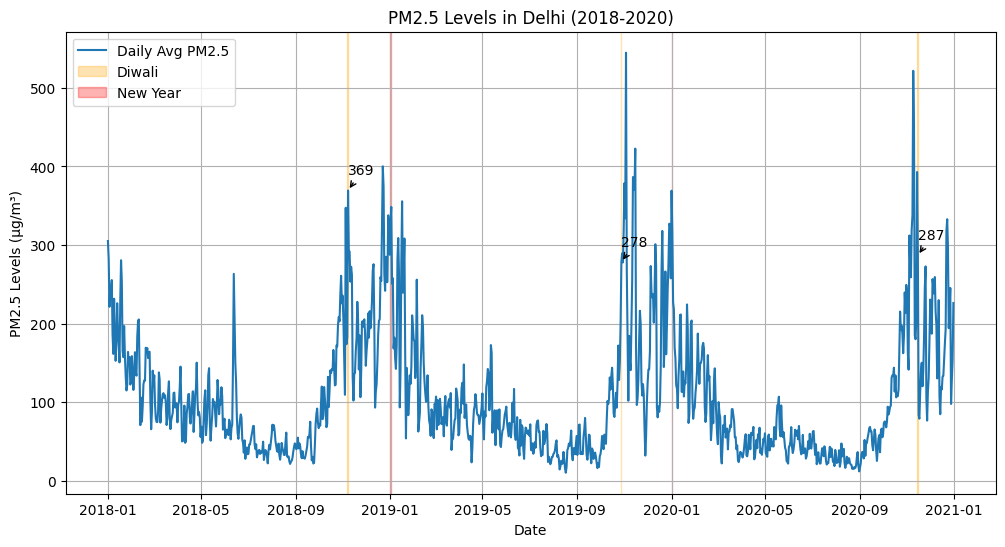

In [27]:
df = pd.read_csv("/content/drive/MyDrive/Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])

delhi_data = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2018) & (df['Date'].dt.year <= 2020)]

daily_avg_pm25 = delhi_data.groupby('Date')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_pm25.index, daily_avg_pm25.values, label='Daily Avg PM2.5')

diwali_periods = [
    (pd.Timestamp('2018-11-07'), pd.Timestamp('2018-11-08')),
    (pd.Timestamp('2019-10-27'), pd.Timestamp('2019-10-28')),
    (pd.Timestamp('2020-11-14'), pd.Timestamp('2020-11-15'))
]

new_year_periods = [
    (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-01-02')),
    (pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-02'))
]


for start, end in diwali_periods:
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Diwali' if start == diwali_periods[0][0] else "")  # Highlight Diwali period

for start, end in new_year_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='New Year' if start == new_year_periods[0][0] else "")  # Highlight New Year period




spike_dates = [
    pd.Timestamp('2018-11-08'),
    pd.Timestamp('2019-10-28'),
    pd.Timestamp('2020-11-15')
]

for date in spike_dates:
    spike_value = daily_avg_pm25[date]
    plt.annotate(f'{spike_value:.0f}', xy=(date, spike_value), xytext=(date, spike_value + 20),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.title('PM2.5 Levels in Delhi (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Question3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

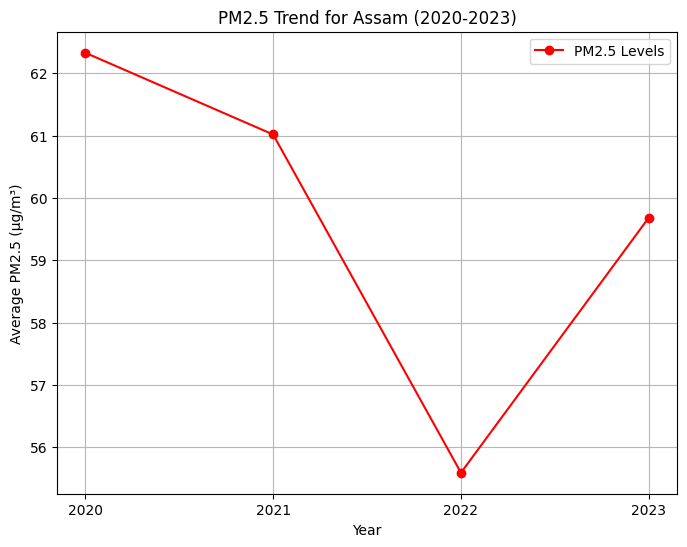

In [28]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')

highest_funded_state = ncap_funding_df.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')

df_highest_funded = data_df[(data_df['state'] == highest_funded_state) & (data_df['Timestamp'].dt.year.isin(range(2020, 2024)))]

pm25_trend = df_highest_funded.groupby(df_highest_funded['Timestamp'].dt.year)['PM2.5'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(pm25_trend["Timestamp"], pm25_trend["PM2.5"], marker="o", color="red", label="PM2.5 Levels")
plt.xlabel("Year")
plt.xticks(range(2020, 2024, 1))
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend for {highest_funded_state} (2020-2023)")
plt.legend()
plt.grid(True,  alpha=0.9)
plt.show()

In [29]:
!pip install geopandas matplotlib

Question4. Draw the map of India and plot the sensor locations on the map.

In [30]:
import folium

india_center = [22.3511, 78.6677]

sensor_data = pd.DataFrame({
    'City': ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Lucknow'],
    'Latitude': [28.6139, 19.0760, 12.9716, 22.5726, 26.8467],
    'Longitude': [77.2090, 72.8777, 77.5946, 88.3639, 80.9462]
})

# Create a folium map centered at India's center
india_map = folium.Map(location = india_center, zoom_start=5)

# Add sensor locations as markers on the map
for _, row in sensor_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}",
        tooltip=row['City'],
        icon=folium.Icon(color='red', icon='star')
    ).add_to(india_map)

india_map.save("india_sensor_map.html")

india_map


**Tell us something new **

Question1:Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.


**Here are some questions which are not asked in this assignment.**

Question1:Which state has the best air quality despite having a high population?

In [46]:
state_data_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")

df = pd.read_csv('/content/drive/MyDrive/Data.csv')

state_avg_pm25 = df.groupby('state')['PM2.5'].mean()

merged_data = pd.merge(state_avg_pm25, state_data_df, left_on='state', right_on='State')

merged_data['PM2.5 per capita'] = merged_data['PM2.5'] / merged_data['Population']

merged_data = merged_data.sort_values(by='PM2.5 per capita')

population_threshold = merged_data['Population'].quantile(0.5)
high_population_states = merged_data[merged_data['Population'] >= population_threshold]

best_air_quality_high_pop = high_population_states.iloc[0]['State']


print(f"The state with the best air quality despite high population is: {best_air_quality_high_pop}")


The state with the best air quality despite high population is: Uttar Pradesh


Question2. Which states have the highest air pollution but received the least funding per capita?


In [47]:
ncap_funding_df = pd.read_csv('/content/drive/MyDrive/NCAP_Funding.csv')
df = pd.read_csv('/content/drive/MyDrive/Data.csv')
state_data_df = pd.read_csv("/content/drive/MyDrive/State_data.csv")
ncap_funding_df['Amount released during FY 2021-22'] = pd.to_numeric(ncap_funding_df['Amount released during FY 2021-22'], errors='coerce')

funding_by_state = ncap_funding_df.groupby('State')['Amount released during FY 2021-22'].sum().reset_index()

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')
average_pm25_by_state = df.groupby('state')['PM2.5'].mean().reset_index()

merged_df = pd.merge(funding_by_state, average_pm25_by_state, left_on='State', right_on='state', how='inner')

merged_df = pd.merge(merged_df, state_data_df, left_on='State', right_on='State', how='left')

merged_df['Funding per capita'] = merged_df['Amount released during FY 2021-22'] / merged_df['Population']

merged_df = merged_df.sort_values(by=['PM2.5', 'Funding per capita'], ascending=[False, True])

least_funded_most_polluted_state = merged_df.iloc[0]['State']

print(f"The state with the highest air pollution and least funding per capita is: {least_funded_most_polluted_state}")


The state with the highest air pollution and least funding per capita is: Delhi
